In [1]:
import numpy as np

from matplotlib import pyplot as plt, set_loglevel

from src.common.paths import ExperimentPath, PlotPaths
from src.common.log import logger
from src.experiments.evaluation.evaluation_data_reader import EvaluationDataReader
from src.plotting.plot_settings import (
    PLOT_WIDTH,
    PLOT_HEIGHT,
    LEGEND_FONT_SIZE,
    GRID_LINE_WIDTH,
    LABEL_FONT_SIZE,
    PLOT_LINE_OPTIONS,
)

set_loglevel("error")

In [2]:
generative_noise = EvaluationDataReader(ExperimentPath("gen_models_snr_20_db"))
generative_no_noise = EvaluationDataReader(ExperimentPath("gen_models_no_noise"))
lasso_noise = EvaluationDataReader(ExperimentPath("lasso_snr_20_db"))
lasso_no_noise = EvaluationDataReader(ExperimentPath("lasso_no_noise"))

In [3]:
vae_bench_mark_path = PlotPaths.PLOTS / "vae_benchmark"
vae_bench_mark_path.mkdir(exist_ok=True)

# VAE vs Lasso

In [4]:
vae_vs_lasso = vae_bench_mark_path / "vae_vs_lasso"
vae_vs_lasso.mkdir(exist_ok=True)

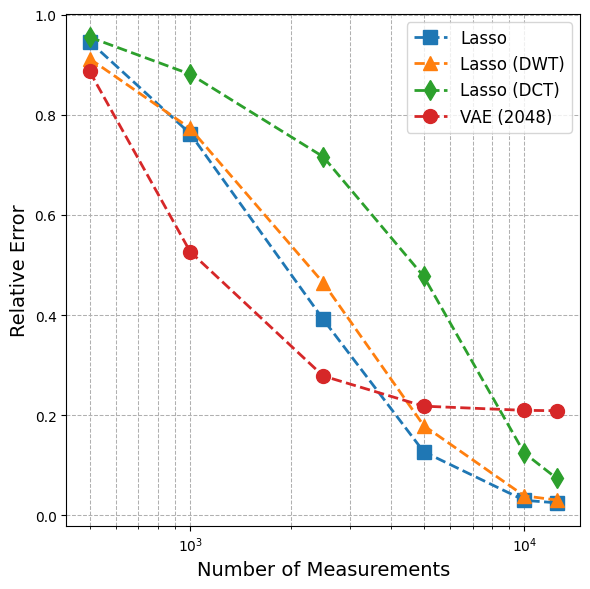

In [5]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(lasso_no_noise.measurements, lasso_no_noise.get_mean_relative_error_per_measurements(solver="lasso"), label="Lasso", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(lasso_no_noise.measurements, lasso_no_noise.get_mean_relative_error_per_measurements(solver="lasso_dwt"), label="Lasso (DWT)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(lasso_no_noise.measurements, lasso_no_noise.get_mean_relative_error_per_measurements(solver="lasso_dct"), label="Lasso (DCT)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_relative_error_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("Relative Error", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(vae_vs_lasso / "vae_vs_lasso_relative_error.eps", format="eps", bbox_inches="tight")

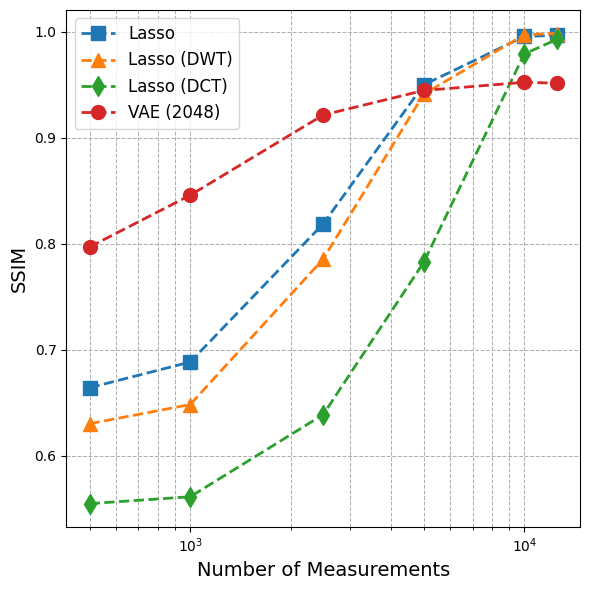

In [6]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(lasso_no_noise.measurements, lasso_no_noise.get_mean_ssim_per_measurements(solver="lasso"), label="Lasso", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(lasso_no_noise.measurements, lasso_no_noise.get_mean_ssim_per_measurements(solver="lasso_dwt"), label="Lasso (DWT)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(lasso_no_noise.measurements, lasso_no_noise.get_mean_ssim_per_measurements(solver="lasso_dct"), label="Lasso (DCT)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_ssim_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("SSIM", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(vae_vs_lasso / "vae_vs_lasso_ssim.eps", format="eps", bbox_inches="tight")

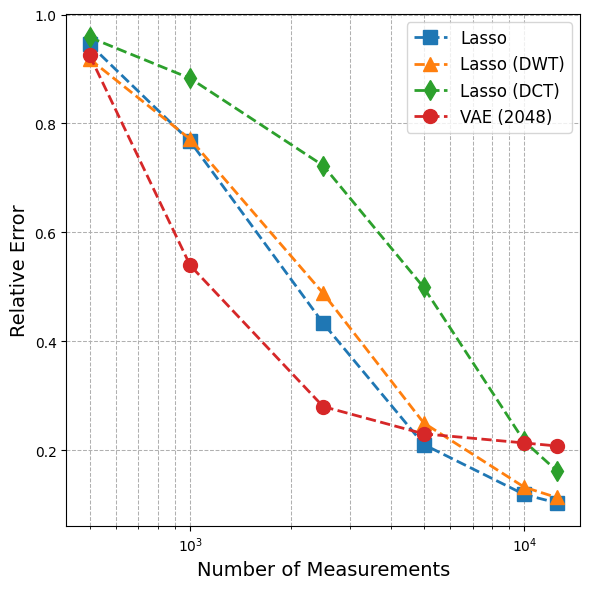

In [7]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(lasso_noise.measurements, lasso_noise.get_mean_relative_error_per_measurements(solver="lasso"), label="Lasso", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(lasso_noise.measurements, lasso_noise.get_mean_relative_error_per_measurements(solver="lasso_dwt"), label="Lasso (DWT)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(lasso_noise.measurements, lasso_noise.get_mean_relative_error_per_measurements(solver="lasso_dct"), label="Lasso (DCT)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_noise.measurements, generative_noise.get_mean_relative_error_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("Relative Error", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(vae_vs_lasso / "vae_vs_lasso_relative_error_noisy.eps", format="eps", bbox_inches="tight")

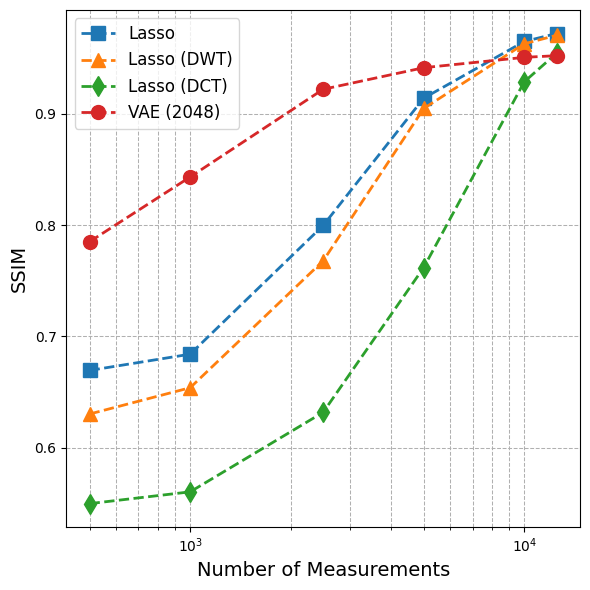

In [8]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(lasso_noise.measurements, lasso_noise.get_mean_ssim_per_measurements(solver="lasso"), label="Lasso", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(lasso_noise.measurements, lasso_noise.get_mean_ssim_per_measurements(solver="lasso_dwt"), label="Lasso (DWT)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(lasso_noise.measurements, lasso_noise.get_mean_ssim_per_measurements(solver="lasso_dct"), label="Lasso (DCT)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_noise.measurements, generative_noise.get_mean_ssim_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("SSIM", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(vae_vs_lasso / "vae_vs_lasso_ssim_noisy.eps", format="eps", bbox_inches="tight")

# Effect of Latent Dimension

In [9]:
effect_of_latent_dimension = vae_bench_mark_path / "effect_of_latent_dimension"
effect_of_latent_dimension.mkdir(exist_ok=True)

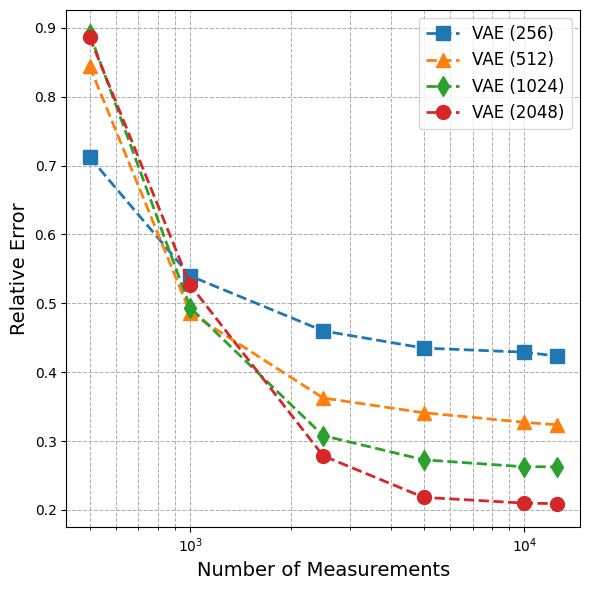

In [10]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_relative_error_per_measurements(solver="256"), label="VAE (256)", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_relative_error_per_measurements(solver="512"), label="VAE (512)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_relative_error_per_measurements(solver="1024"), label="VAE (1024)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_relative_error_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("Relative Error", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(effect_of_latent_dimension / "effect_of_latent_dimension_relative_error.eps", format="eps", bbox_inches="tight")

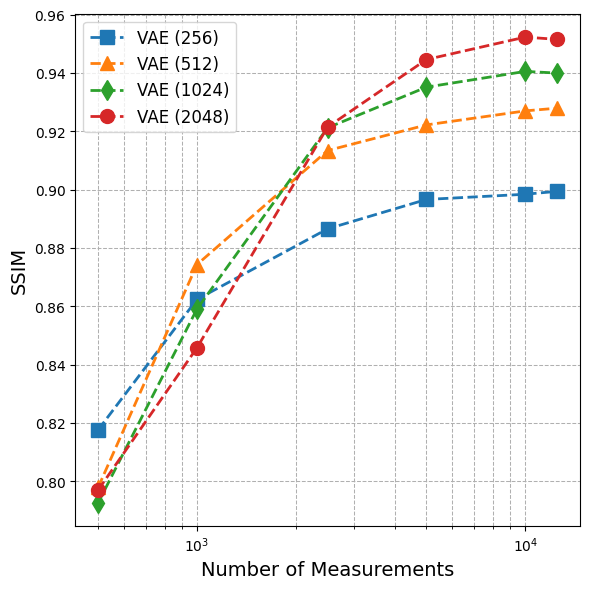

In [11]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_ssim_per_measurements(solver="256"), label="VAE (256)", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_ssim_per_measurements(solver="512"), label="VAE (512)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_ssim_per_measurements(solver="1024"), label="VAE (1024)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_no_noise.get_mean_ssim_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("SSIM", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(effect_of_latent_dimension / "effect_of_latent_dimension_ssim.eps", format="eps", bbox_inches="tight")

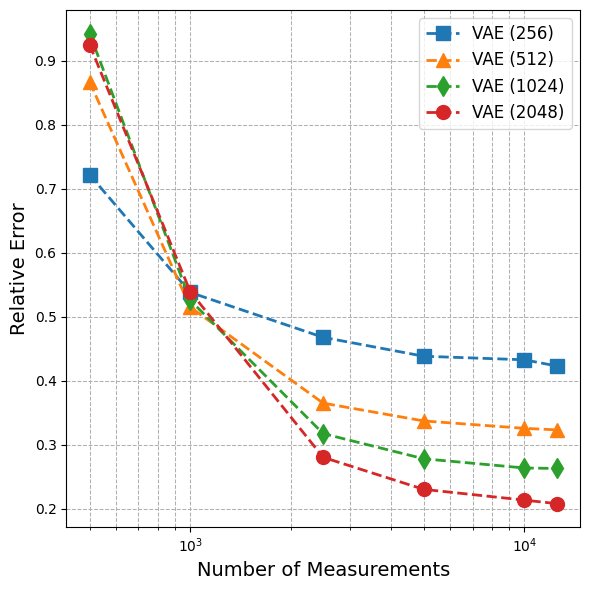

In [12]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(generative_no_noise.measurements, generative_noise.get_mean_relative_error_per_measurements(solver="256"), label="VAE (256)", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_noise.get_mean_relative_error_per_measurements(solver="512"), label="VAE (512)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_noise.get_mean_relative_error_per_measurements(solver="1024"), label="VAE (1024)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_noise.get_mean_relative_error_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("Relative Error", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(effect_of_latent_dimension / "effect_of_latent_dimension_relative_error_noisy.eps", format="eps", bbox_inches="tight")

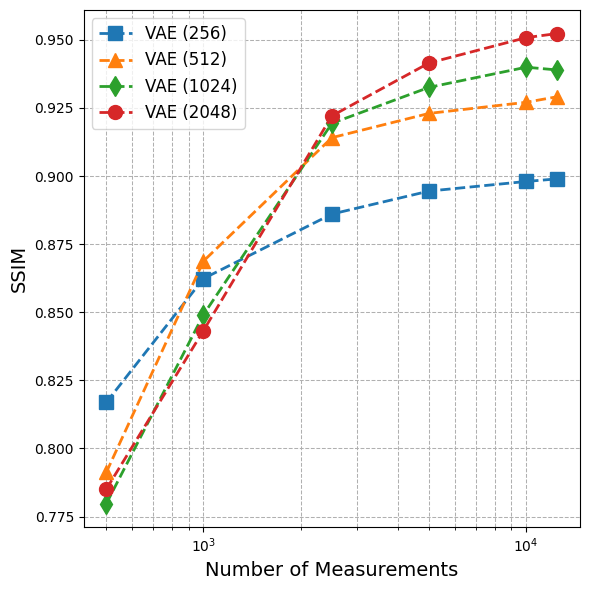

In [13]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

ax.plot(generative_no_noise.measurements, generative_noise.get_mean_ssim_per_measurements(solver="256"), label="VAE (256)", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_noise.get_mean_ssim_per_measurements(solver="512"), label="VAE (512)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_noise.get_mean_ssim_per_measurements(solver="1024"), label="VAE (1024)", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(generative_no_noise.measurements, generative_noise.get_mean_ssim_per_measurements(solver="2048"), label="VAE (2048)", marker="o", **PLOT_LINE_OPTIONS)

ax.set_xscale("log")
ax.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
ax.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)
ax.set_xlabel("Number of Measurements", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("SSIM", fontsize=LABEL_FONT_SIZE)

plt.tight_layout()
plt.savefig(effect_of_latent_dimension / "effect_of_latent_dimension_ssim_noisy.eps", format="eps", bbox_inches="tight")

# Effect of Fine-tuning

In [14]:
ZURICH = "zürich"
MUNICH = "munich"
PARIS = "paris"

fine_tuned_data = {
    MUNICH: EvaluationDataReader(ExperimentPath("fine_tuned_munich_no_noise")),
    ZURICH: EvaluationDataReader(ExperimentPath("fine_tuned_zürich_no_noise")),
    PARIS: EvaluationDataReader(ExperimentPath("fine_tuned_paris_no_noise")),
}

In [15]:
relative_error_improvements = {}
ssim_improvements = {}

for city, data in fine_tuned_data.items():
    relative_error_improvements[city] = {}
    ssim_improvements[city] = {}

    for model in ["256", "512", "1024", "2048"]:
        relative_error_improvements[city][model] = {}        
        base_relative_error = data.get_mean_relative_error_per_measurements(solver=model)
        fine_tuned_relative_error = data.get_mean_relative_error_per_measurements(solver=f"{model}_{city}")
        for m, (b, f) in zip(data.measurements, zip(base_relative_error, fine_tuned_relative_error)):
            improvement = -(f - b) / b
            relative_error_improvements[city][model][m] = improvement

        ssim_improvements[city][model] = {}
        base_ssim = data.get_mean_ssim_per_measurements(solver=model)
        fine_tuned_ssim = data.get_mean_ssim_per_measurements(solver=f"{model}_{city}")
        for m, (b, f) in zip(data.measurements, zip(base_ssim, fine_tuned_ssim)):
            improvement = (f - b) / b
            ssim_improvements[city][model][m] = improvement

In [16]:
for city, data in relative_error_improvements.items():
    logger.info(f"Relative error improvements for {city.capitalize()}:")
    for model, model_data in data.items():
        average_improvement = np.array(list(model_data.values())).mean()
        logger.info(f"\t{model}: {100 * average_improvement:.2f}%")
for city, data in ssim_improvements.items():
    logger.info(f"SSIM improvements for {city.capitalize()}:")
    for model, model_data in data.items():
        average_improvement = np.array(list(model_data.values())).mean()
        logger.info(f"\t{model}: {100 * average_improvement:.2f}%")

[INFO] > Relative error improvements for Munich:
[INFO] > 	256: 30.87%
[INFO] > 	512: 30.60%
[INFO] > 	1024: 24.55%
[INFO] > 	2048: 14.66%
[INFO] > Relative error improvements for Zürich:
[INFO] > 	256: 31.32%
[INFO] > 	512: 33.39%
[INFO] > 	1024: 25.73%
[INFO] > 	2048: 21.73%
[INFO] > Relative error improvements for Paris:
[INFO] > 	256: 29.83%
[INFO] > 	512: 31.59%
[INFO] > 	1024: 20.20%
[INFO] > 	2048: 14.54%
[INFO] > SSIM improvements for Munich:
[INFO] > 	256: 0.02%
[INFO] > 	512: -2.54%
[INFO] > 	1024: -1.67%
[INFO] > 	2048: -1.63%
[INFO] > SSIM improvements for Zürich:
[INFO] > 	256: -4.14%
[INFO] > 	512: -3.69%
[INFO] > 	1024: -4.61%
[INFO] > 	2048: -4.53%
[INFO] > SSIM improvements for Paris:
[INFO] > 	256: 5.43%
[INFO] > 	512: 5.71%
[INFO] > 	1024: 4.03%
[INFO] > 	2048: 2.10%
